## Objective

The objective of this notebook is to solve the first Programming Assignment of Andrew Ng's Machine Learning course on Coursera using Python. Watching the videos first (which are fantastic btw) and then solving the assignment is the right way to go and this notebook will summarise the important concepts explained in the videos. However for those of you who don't want to take the course due to lack of time/ motivation/ aversion to MATLAB/Ocatve and want to only understand the important concepts explained in the first 2 weeks, feel free to go through my notebook. 

In [3]:
from IPython.display import Image, display

## Cost Function Overview

First and foremost, we need to define the cost function.
<img src='Cost Function.png'>

## Gradient Descent Overview

Gradient descent is an optimization algorithm. Using this, we find the minimum of a function by taking the partial derivative of the cost function with respect to every parameter that the function takes and subtracting that from the initial randomised value of the parameter. For most machine learning methods, we try to optimize the cost function. Gradient descent is susceptible to local minimas, however, in the case of linear regression, the cost function is convex which means that there is only one minima. Thus by using gradient descent we will always converge to the global minima and it will give us the optimized parameters for which the cost function/mean squared error is minimum and these parameters will define the best fit line.

We reach the local minimum by taking the derivative of the cost function at the point where we start (this is usually random). The derivative of the cost function is a tangential line to the function and the slope of the tangent is the derivative at that point and it will give us a direction to move towards. 

![title](GD General.png)

![title](GD Linear Regression.png)

For theta(1) to theta(n), the partial derivative of the the cost function wrt the thetas will give us the additional ith x term that you see at the end.

If you start with a bad random value for a particular theta, the derivative of the cost function with respect to that parameter will be steep. Hence when we update our theta (i.e subtract the partial derivative from it), we will have minimised our cost function wrt the theta to a great extent.

The alpha is the learning rate. It can be thought of as a hyperparameter as we need to set it's value before the learning begins. 
- If it's value is small, gradient descent will take a long time to converge
- If it's value is large, the cost function may not converge to it's minimum value.

![title](GD Intuition.png)

![title](Intuition 1.png)

![title](Intuition 2.png)

## Reading and plotting the data 

In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#To read the data
data = pd.read_csv('ex1data1.csv',header=None)
data.columns=['Population','Profit']
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
#To define the X and y values
X=data['Population']
y=data['Profit']

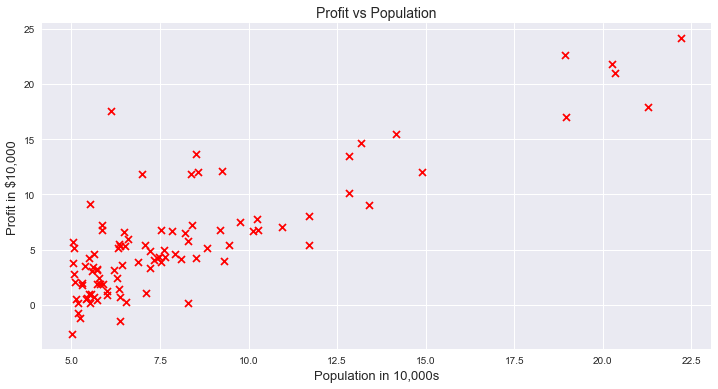

In [5]:
#Plotting the data
plt.figure(figsize=(12,6))
plt.scatter(data['Population'],data['Profit'],marker='x',color='red')
plt.title('Profit vs Population',size=14)
plt.xlabel('Population in 10,000s',size=13)
plt.ylabel('Profit in $10,000',size=13)

A linear hypothesis seems like a good fit for the data as there is clearly a linear trend in the data. 

## Feature Scaling 

Feature scaling/ normalization is important as it helps speed the learning. Thetas that are on the same scale help in minimizing the cost function efficiently.

![title](Feature Normalization.png)

## Putting it all together 

- X is the design matrix. Contains the feature values
- y is the observed response/target
- thetas are our parameters
- hypothesis is the product of X and thetas. This is our prediction
- m is the number of training examples

In [6]:
def COMPUTECOST(X,y,theta):
    m=len(y)
    hypothesis=np.dot(X,theta).flatten()
    return((1/(2*m))*sum(np.square(hypothesis-y.values)))

In [7]:
#To normalize the features
X=(X-np.mean(X))/np.std(X)

In [8]:
#To add an additional column. Why is it needed? Since we're trying to perform matrix multiplications, it is 
#necessary that the conditions for matrix multiplication are satisfied. Since theta 0 doesn't have a 
#corresponding column in X, to be consistent we need to have an additional column that only has ones
X0=pd.Series(np.ones(len(y)),name='X0')
X = pd.concat([X0,X],axis=1)

In [9]:
#Setting a random value for theta
theta=np.zeros((2,1))

In [10]:
#Now computing the cost
COMPUTECOST(X,y,theta)

32.072733877455654

In [11]:
#Now defining the gradient descent function with a vectorised implementation
def GRADIENTDESCENT(X,y,alpha,iterations):
    COST=[]
    THETAS=[]
    m=len(y)
    theta=np.zeros(X.shape[1])
    for i in range(iterations):
        hypothesis=np.dot(X,theta).flatten()
        theta=theta-(alpha/m)*np.dot((np.transpose(X).values),(hypothesis-y.values))
        COST.append(COMPUTECOST(X,y,theta))
        THETAS.append(theta)
    return(min(COST),THETAS[COST.index(min(COST))])

Some important clarifications:

- (X x theta) gives us the hypothesis. X is an (m x n) dimensional matrix and theta is a (n x 1) dimensional vector. The product of two gives us an (m x 1) dimensional vector. This is basically our prediction
- (hypothesis - y) gives us the error term. y is also an m dimensional vector, hence matrix subtraction is possible
- taking the transpose of X saves us from summing each theta over m examples. X transpose is a (n x m) dimensional matrix. In this case, our first row is all 1, and the second row contains m values of the feature 'Population'
- When we multiply X transpose with (hypothesis - y), we get an n dimensional vector. Each m dimensional row vector in X transpose gets multiplied (dot product) with the m dimensional vector (hypothesis - y) and summed over 
- Multiplying this n dimensional vector with (alpha/m) which is a constant and then subtracting from the theta vector helps us in updating the thetas

Why is this implementation helpful? Instead of running 2 for loops - one for the number of iterations of gradient descent and the other over the number of training examples, this way we perform the matrix multiplication and summation effectively.

In [12]:
#To get the RMSE, multiply the COST by 2 since we have 2 in the denominator of the cost function
#Running the GRADIENTDESCENT ALGORITHM for 1000 iterations with a learning rate of 0.1
print('The intercept and slope of the best fit line is',GRADIENTDESCENT(X,y,0.1,1000)[1][0],'and',
     GRADIENTDESCENT(X,y,0.1,1000)[1][1],'respectively with an RMSE of ',(GRADIENTDESCENT(X,y,0.1,1000)[0])*2)

The intercept and slope of the best fit line is 5.83913505154 and 4.59304113336 respectively with an RMSE of  8.95394275195


## Validation 

In [13]:
#We can validate this by using Linear Regression from scikit learn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg=LinearRegression()
linreg.fit(X,y)
print('The intercept and slope of the best fit line is',linreg.intercept_,'and',linreg.coef_[1],
      'respectively with and RMSE of',metrics.mean_squared_error(y.values,linreg.predict(X)))

The intercept and slope of the best fit line is 5.83913505155 and 4.59304113336 respectively with and RMSE of 8.95394275195


One very very important thing to note here is that, due to feature scaling, our optimised/ minimized cost will still remain the same. HOWEVER, our coeffecients may change.

In [14]:
#Proof
lm=LinearRegression()
lm.fit(data.drop('Profit',axis=1),data['Profit'])
print('The intercept and slope of the best fit line is',lm.intercept_,'and',lm.coef_[0],
      'respectively with and RMSE of',metrics.mean_squared_error(data['Profit'],
                                                                 lm.predict(data.drop('Profit',axis=1))))

The intercept and slope of the best fit line is -3.89578087831 and 1.19303364419 respectively with and RMSE of 8.95394275195
